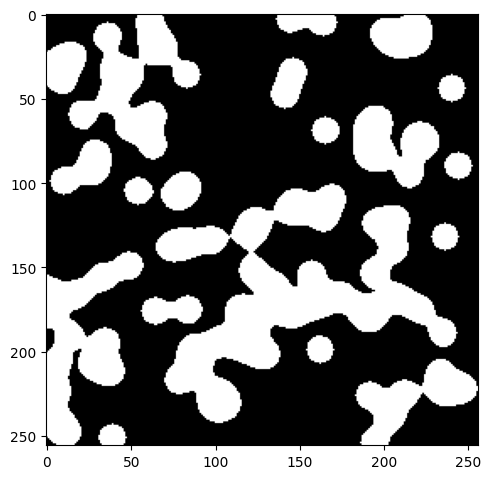

In [29]:
# Generate synthetic image with random blobs

import skimage as sk
import matplotlib.pyplot as plt

blobs = sk.data.binary_blobs(length=256, blob_size_fraction=0.1,volume_fraction=0.35)

fig = plt.figure(figsize=(5,5))
plt.imshow(blobs, cmap='gray')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/skimage/exposure/exposure.py:306: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, bin_edges = np.histogram(image, bins=bins, range=hist_range)


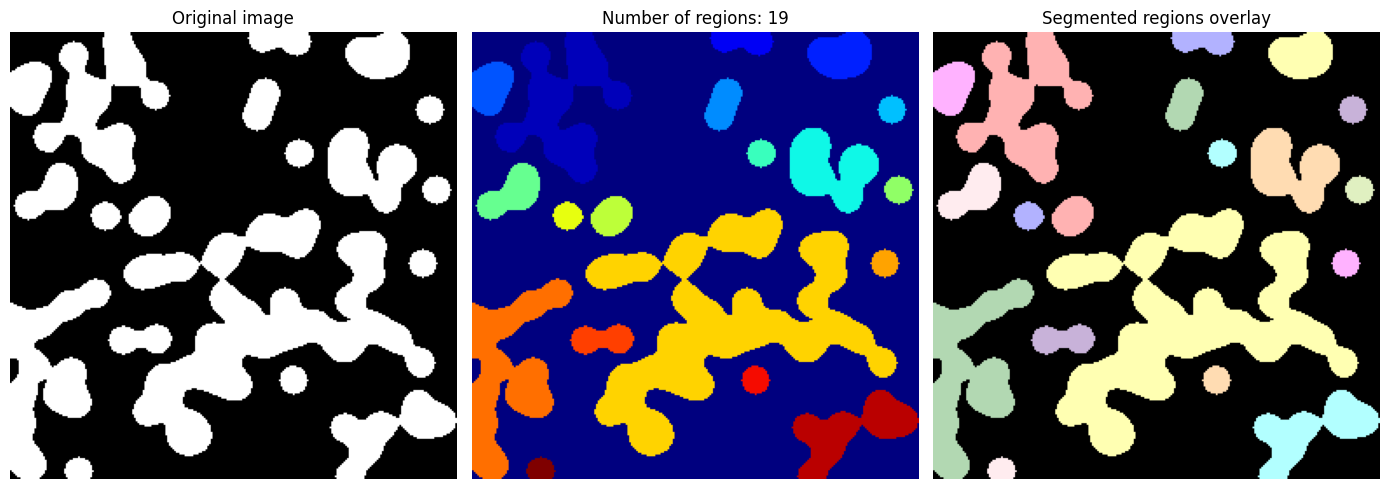

In [30]:
from skimage.filters import threshold_otsu
from skimage.measure import label
from skimage.color import label2rgb

# Otsu Threshold for segmentation
thresh = threshold_otsu(blobs)
bw = blobs > thresh # keep lighter regions with grayscale intensities above threshold

# Label image regions
label_image, nregions = label(bw, return_num=True)
image_label_overlay = label2rgb(label_image, image=blobs)

fig, axes = plt.subplots(1, 3, figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(label_image, cmap=plt.cm.jet)
ax[1].set_title('Number of regions: {}'.format(nregions))
ax[2].imshow(image_label_overlay, cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

In [31]:
# Get regional properties

import pandas as pd

# Extract region properties into a DataFrame
properties = ['label', 'area', 'eccentricity', 'extent', 'axis_major_length']
props = measure.regionprops_table(label_image, properties=properties)

df_features = pd.DataFrame(props)
df_features.head()

,label,area,eccentricity,extent,axis_major_length
0,1,2889.0,0.680016,0.420340,89.344655
1,2,387.0,0.943638,0.747104,40.117746
2,3,791.0,0.716775,0.791792,38.343600
3,4,589.0,0.708511,0.791667,32.853140
4,5,454.0,0.826324,0.665689,32.208877


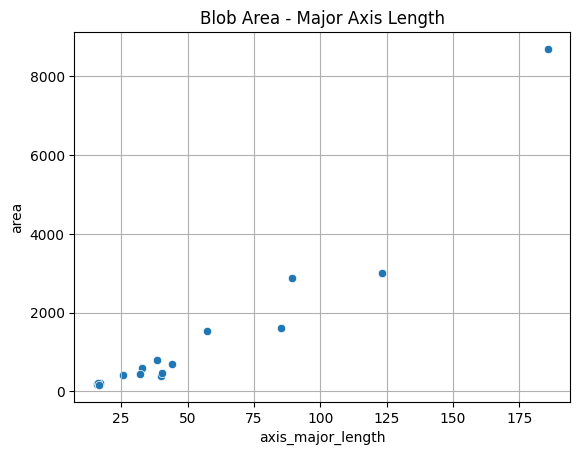

In [32]:
# Represent area of the blobs as a function of the major axis length

import seaborn as sns

sns.scatterplot(x='axis_major_length',y='area',data=df_features)
plt.title('Blob Area - Major Axis Length')
plt.grid('true')

In [33]:
# The number of blobs with an area above or equal to the average

df_features.loc[df_features['area']>=df_features['area'].mean()]

,label,area,eccentricity,extent,axis_major_length
0,1,2889.0,0.680016,0.420340,89.344655
6,7,1538.0,0.697581,0.615446,57.335048
12,13,8699.0,0.752045,0.342238,185.734244
14,15,3004.0,0.905954,0.450375,123.345687
17,18,1619.0,0.913723,0.434864,85.168885


In [34]:
mean_blobs_area = df_features['area'].mean()
df_large_blobs = df_features.loc[df_features['area']>=mean_blobs_area]
N_large = df_large_blobs.shape[0]
print('there are {} blobs with an area larger or equal the mean area {}'.format(N_large,mean_blobs_area))

there are 5 blobs with an area larger or equal the mean area 1207.2631578947369


In [35]:
# The number of blobs with an area below the average

df_features.loc[df_features['area']<df_features['area'].mean()]

,label,area,eccentricity,extent,axis_major_length
1,2,387.0,0.943638,0.747104,40.117746
2,3,791.0,0.716775,0.791792,38.343600
3,4,589.0,0.708511,0.791667,32.853140
4,5,454.0,0.826324,0.665689,32.208877
5,6,197.0,0.000000,0.681661,15.846984
7,8,203.0,0.296278,0.702422,16.455526
8,9,691.0,0.864340,0.565930,43.936136
9,10,203.0,0.258451,0.702422,16.363903
10,11,421.0,0.574498,0.762681,25.595989
11,12,213.0,0.350741,0.696078,17.036183


In [36]:
mean_blobs_area = df_features['area'].mean()
df_small_blobs = df_features.loc[df_features['area']<mean_blobs_area]
N_small = df_small_blobs.shape[0]
print('there are {} blobs with an area smaller than the mean area {}'.format(N_small,mean_blobs_area))

there are 14 blobs with an area smaller than the mean area 1207.2631578947369


In [37]:
# Find the labels of small and large blobs

labels_small = df_small_blobs['label'].values
print('labels of small blobs: {}'.format(labels_small))
labels_large = df_large_blobs['label'].values
print('labels of large blobs: {}'.format(labels_large))

labels of small blobs: [ 2  3  4  5  6  8  9 10 11 12 14 16 17 19]
labels of large blobs: [ 1  7 13 15 18]


In [38]:
# Create a binary mask with the large and small blobs

import numpy as np
mask_small_blobs = np.isin(label_image, labels_small)
mask_large_blobs = np.isin(label_image, labels_large)

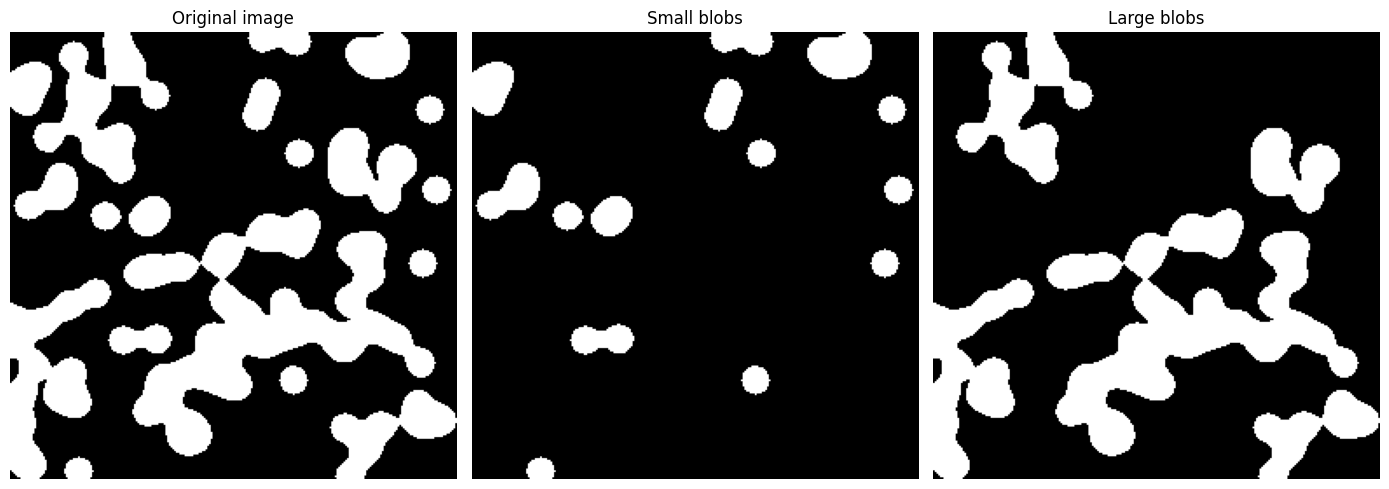

In [39]:
# Represent the large and small blobs

fig, axes = plt.subplots(1, 3, figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('Original image')
#ax[1].imshow(mask_small_blobs, cmap=plt.cm.jet)
ax[1].imshow(mask_small_blobs, cmap='gray', vmin=0, vmax=1)
ax[1].set_title('Small blobs')
#ax[2].imshow(mask_large_blobs, cmap=plt.cm.jet)
ax[2].imshow(mask_large_blobs, cmap='gray', vmin=0, vmax=1)
ax[2].set_title('Large blobs')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
plt.show()

In [40]:
# Texture-based regional properties

from skimage.feature.texture import graycomatrix, graycoprops

image = np.array([[0, 0, 1, 1], [0, 0, 1, 1], [0, 2, 2, 2], [2, 2, 3, 3]], dtype=np.uint8)
g = graycomatrix(blobs, [1], [0], levels=4, normed=False, symmetric=False)
print(image)
print('Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[0,0,0,0]))
print('Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[0,1,0,0]))
print('Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[2,2,0,0]))
print('Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): {}'.format(g[2,0,0,0]))

[[0 0 1 1]
 [0 0 1 1]
 [0 2 2 2]
 [2 2 3 3]]
Number of times that a grayscale level zero has a neighbour with value zero at a distance of 1 pixel to the right (angle equal zero): 41438
Number of times that a grayscale level zero has a neighbour with value 1 at a distance of 1 pixel to the right (angle equal zero): 907
Number of times that a grayscale level 2 has a neighbour with value 2 at a distance of 1 pixel to the right (angle equal zero): 0
Number of times that a grayscale level 2 has a neighbour with value 0 at a distance of 1 pixel to the right (angle equal zero): 0


In [45]:
from skimage.measure import regionprops
from skimage import img_as_ubyte

props = regionprops(label_image, intensity_image=blobs)
nregions = len(props)

props_texture = np.zeros((nregions, 5))
for i, p in enumerate(props):
    minr, minc, maxr, maxc = p.bbox
    I = blobs[minr:maxr, minc:maxc]

    Iu8 = img_as_ubyte(I)

    # Calculate GLCM
    g = graycomatrix(Iu8, distances=[1], angles=[0], levels=256, normed=True, symmetric=True)

    # Extract characteristics
    props_texture[i, 0] = graycoprops(g, 'contrast')[0, 0]
    props_texture[i, 1] = graycoprops(g, 'dissimilarity')[0, 0]
    props_texture[i, 2] = graycoprops(g, 'homogeneity')[0, 0]
    props_texture[i, 3] = graycoprops(g, 'energy')[0, 0]
    props_texture[i, 4] = graycoprops(g, 'correlation')[0, 0]

df = pd.DataFrame(props_texture, columns=['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'])
df

,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,3133.388594,12.287798,0.951813,0.674183,0.903550
1,4128.571429,16.190476,0.936509,0.762834,0.822956
2,2609.027778,10.231481,0.959877,0.805509,0.871663
3,3191.970547,12.517532,0.950912,0.801253,0.842319
4,5393.778802,21.152074,0.917052,0.705039,0.805672
5,7650.000000,30.000000,0.882355,0.702504,0.707841
6,3078.734694,12.073469,0.952654,0.696335,0.899265
7,6693.750000,26.250000,0.897060,0.719988,0.735556
8,3119.886364,12.234848,0.952021,0.682969,0.901656
9,6932.812500,27.187500,0.893384,0.719175,0.724884
